In [1]:
# Import des librairies
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# MNIST
mnist = tf.keras.datasets.mnist
(images, labels), (_,_) = mnist.load_data()
# Comprendre le nombre d'images et leurs nombre de pixels
print(images.shape)
# Nombre de pixels d'une image
print(images[0].shape)
# Les étiquettes sont des nombres entre 0 et 9
print(np.unique(labels))



(60000, 28, 28)
(28, 28)
[0 1 2 3 4 5 6 7 8 9]


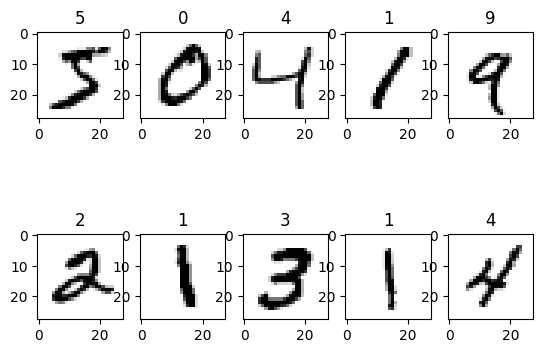

In [3]:
# Affichage des 10 premières images
f, axarr = plt.subplots(2,5)
for i in range(10) :
    axarr[i//5, i % 5].imshow(images[i].reshape(28, 28), cmap = "binary")
    axarr[i//5, i%5].title.set_text(labels[i])

In [4]:
# Normalisation des données

# Redimensionnement des images
images = images.reshape(-1, 784)
images = images.astype(float)

# Normalisation
scaler = StandardScaler()
images = scaler.fit_transform(images)

In [5]:
# Création de données d'entrainement, de validation et de test

images_train, images_test, labels_train, labels_test = train_test_split(images, labels, test_size=0.2, random_state=1)

print(images_train.shape)
print(images_test.shape)

(48000, 784)
(12000, 784)


In [6]:
# Création d'un modèle d'intelligence artificielle

# Création du modèle
model = tf.keras.models.Sequential()
# Ajout des couches internes
model.add(tf.keras.layers.Dense(256, activation = "relu"))
model.add(tf.keras.layers.Dense(128, activation = "relu"))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

In [7]:
# Compilation du modèle

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

In [8]:
# Entrainement du modèle sur les données d'entrainement

history= model.fit(images_train, labels_train, epochs=10, validation_split=0.2)

Epoch 1/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.4870 - accuracy: 0.8657 - val_loss: 0.2834 - val_accuracy: 0.9203
Epoch 2/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.2113 - accuracy: 0.9380 - val_loss: 0.2232 - val_accuracy: 0.9410
Epoch 3/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1571 - accuracy: 0.9542 - val_loss: 0.1975 - val_accuracy: 0.9480
Epoch 4/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1253 - accuracy: 0.9637 - val_loss: 0.1765 - val_accuracy: 0.9534
Epoch 5/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1034 - accuracy: 0.9707 - val_loss: 0.1681 - val_accuracy: 0.9560
Epoch 6/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0869 - accuracy: 0.9762 - val_loss: 0.1606 - val_accuracy: 0.9582
Epoch 7/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0742 - accuracy: 0.9799 - val_loss: 0.1589 - val_accuracy:

In [9]:
# Prédiction des 5 premières images
model_output = model.predict(images_test[0:5])
# Vérification si la prédiction est correcte
for i in range(5):
    print(f"Donnée {i} :")
    index_max_value = np.argmax(model_output[i])
    print(f"\tSortie prédite : {index_max_value}")
    print(f"\tSortie calculée : {labels[i]}")

1/1 [==============================] - 0s 220ms/step
Donnée 0 :
	Sortie prédite : 5
	Sortie calculée : 5
Donnée 1 :
	Sortie prédite : 0
	Sortie calculée : 0
Donnée 2 :
	Sortie prédite : 4
	Sortie calculée : 4
Donnée 3 :
	Sortie prédite : 1
	Sortie calculée : 1
Donnée 4 :
	Sortie prédite : 9
	Sortie calculée : 9


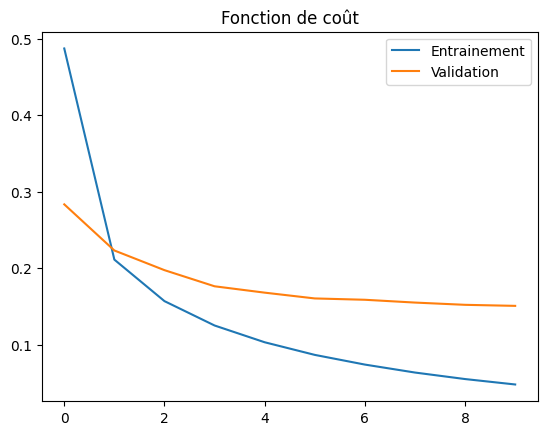

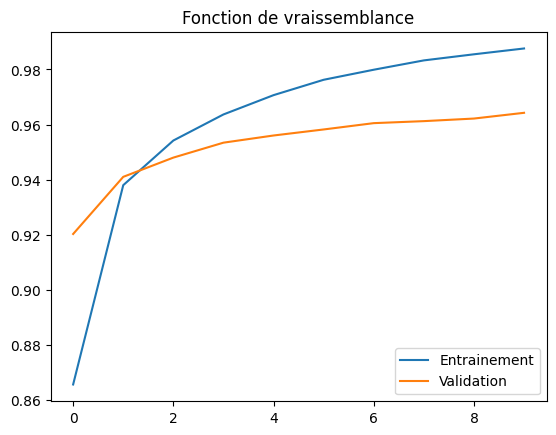

In [19]:
# Analyse des fonctions d'erreurs et de vraissemblance

plt.plot(history.history["loss"], label="Entrainement")
plt.plot(history.history["val_loss"], label="Validation")
plt.legend(loc="upper right")
plt.title("Fonction de coût")
plt.show()

plt.plot(history.history["accuracy"], label="Entrainement")
plt.plot(history.history["val_accuracy"], label="Validation")
plt.legend(loc="lower right")
plt.title("Fonction de vraissemblance")
plt.show()

